In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Creating TensorFlow object 
hello_constant = tf.constant('Hello World!', name = 'hello_constant')
#Creating a session object for execution of the computational graph
with tf.Session() as sess:
    #Implementing the tf.constant operation in the session
    output = sess.run(hello_constant)
print(hello_constant.name)

hello_constant_1:0


In [7]:
# tensorboard --logdir=path/to/logs/directory

In [8]:
# The function takes two numbers, two tensors, or one of each, and it returns their sum as a tensor:

x = tf.add(1, 2, name = None)
y = tf.subtract(1, 2, name = None)
z = tf.multiply(2, 5, name = None)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    a = sess.run(z)
print(a)

10


In [26]:
# a non-constant
# these placeholders with the help of the feed_dict parameter in tf.session.run() to set the placeholder tensor.
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32, None)
z = tf.placeholder(tf.float32, None)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    output = sess.run(z, feed_dict={x:'Welcome to CNN', y:123, z:1.15}) # Use feed_dict To Feed Values To TensorFlow Placeholders
print(output)

1.15


In [43]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder('float', [None, 3])
y = x + 2

input_data = [[1, 2, 3], [4, 5, 6]]
with tf.Session() as sess:
#     input_data = [[1, 2], [4, 5]]
    result = sess.run(y, feed_dict={x:input_data})
print(result)

[[3. 4. 5.]
 [6. 7. 8.]]


[[ 0.8187473   0.62019604]
 [ 0.51454544  1.8081291 ]
 [-0.15151252  0.29873723]
 [ 0.24149618  1.1187779 ]
 [-0.35043576 -1.3074737 ]]


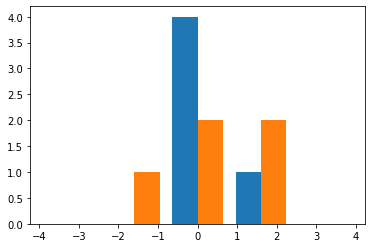

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n_features = 5
n_labels = 2
weights = tf.truncated_normal((n_features, n_labels))  #This is mostly used for weight initialization in a network:

with tf.Session() as sess:
    out = sess.run(weights)
    print(out)
plt.hist(out, 5, (-4, 4));


# Softmax in TensorFlow

The softmax function converts its inputs, known as logit or logit scores, to be between 0
and 1, and also normalizes the outputs so that they all sum up to 1. In other words, the
softmax function turns your logits into probabilities. Mathematically, the softmax function
is defined as follows:

In [70]:
logit_data = [2.0, 1.0, 0.1]

logits = tf.placeholder(tf.float32)

softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    output = sess.run(softmax, feed_dict={logits: logit_data})
print(output)

[0.6590012  0.24243298 0.09856589]


https://colah.github.io/posts/2015-09-Visual-Information/

https://github.com/PacktPublishing/Practical-Convolutional-Neural-Networks/blob/master/Chapter01/code%20files/mnist_tf%20(1).ipynb

In [79]:
x = tf.constant([[1, 1, 1], [1, 1, 1]])
with tf.Session() as sess:
    print(sess.run(tf.reduce_sum([1, 2, 3]))) # return 6
    print(sess.run(tf.reduce_sum(x, axis=1)))

6
[3 3]


# Formula of cross entropy

In [92]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

softmax_data = [0.1, 0.4, 0.5]
onehot = [0.0, 1.0, 0.0]

softmax = tf.placeholder(tf.float32)
onehot_encoding = tf.placeholder(tf.float32)

cross_entropy = -tf.reduce_sum(tf.multiply(onehot_encoding, tf.log(softmax))) # tf.log() is ln()

cross_entropy_loss = tf.nn.softmax_cross_entropy_with_logits(logits = tf.log(softmax), labels = onehot_encoding)

with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict = {softmax: softmax_data,   onehot_encoding: onehot}))
    print(sess.run(cross_entropy_loss, feed_dict = {softmax: softmax_data,   onehot_encoding: onehot}))

0.9162907
0.9162907


# MNIST dataset
where a value of zero means darkest and 255 is the whitest, and a gray pixel is between 0 and 255.

# The simplest artificial neural network


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# All the pixels in the image (28 * 28 = 784)
features_count = 784
# There are 10 digits labels
labels_count = 10


batch_size = 128
epochs = 1
learning_rate = 0.5

features = tf.placeholder(tf.float32, [None, features_count])
labels = tf.placeholder(tf.float32, [None, labels_count])

# Set the weights and bias tensor
weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
biases = tf.Variable(tf.zeros(labels_count), name = 'biases')

# Linear function Wx + b
logits = tf.add(tf.matmul(features, weights), biases)


'''==============================================================================================='''
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
'''================================================================================================'''


prediction = tf.nn.softmax(logits)

# cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction),reduction_indices=1) # reduction_indices: The old (deprecated) name for axis.

# Training loss
loss = tf.reduce_mean(cross_entropy)
                      
# Initializing all variables
init = tf.global_variables_initializer()
                      
# Determining if the predictions are accurate
is_correct_prediction = tf.equal(tf.argmax(prediction, 1),tf.argmax(labels, 1))
                      
#Calculating prediction accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
                      
 
with tf.Session() as sess:
      # initializing all the variables
    sess.run(init)

    total_batch = int(len(mnist.train.labels) / batch_size)
    
    for epoch in range(epochs):
        avg_cost = 0
        
        for i in range(total_batch):
               batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
               _, c = sess.run([optimizer,loss], feed_dict={features: batch_x,labels: batch_y})
               avg_cost += c / total_batch
                
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        print(sess.run(accuracy, feed_dict={features: mnist.test.images, labels: mnist.test.labels}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 1 cost = 1.212
0.8588


# Keras deep learning library overview

In [44]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# Create sequential model 
model = Sequential()

# Layer 1: adding a Flatten layer
model.add(Flatten(input_shape=(32, 32, 3)))

# Layer 2: adding a fully connected layer
model.add(Dense(100))

# Layer 3: adding a ReLU activation layer
model.add(Activation('relu'))

# Layer 4: Adding a fully connected layer
model.add(Dense(60))

# Layer 5: Adding a ReLU activation layer
model.add(Activation('relu'))



In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


# Retriving the training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape: {}'. format(X_train.shape), '\n')
print('X_test shape: {}'.format(X_test.shape), '\n')
print('y_train shape: {}'.format(y_train.shape), '\n')
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (60000, 28, 28) 

X_test shape: (10000, 28, 28) 

y_train shape: (60000,) 

y_test shape: (10000,)


the number is: 5


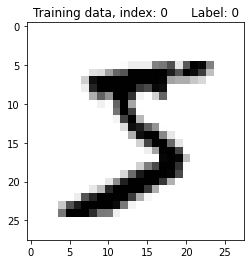

Train the matrix shape:  (60000, 784)
Test the matrix shape:  (10000, 784)


In [46]:
import  tensorflow.compat.v1 as tf
tf.reset_default_graph()


# Displaying a training image by its index in the MNIST set
def display_digit(index):
    print('the number is: {}'.format(y_train[index]))
    label = y_train[index].argmax(axis = 0) # index of the max number in column
    image = X_train[index]
 
    
    plt.title('Training data, index: {}      Label: {}'.format(index, label))
    plt.imshow(image, cmap = 'gray_r')
    plt.show()
    
# Display the first (index 0) of the training image
display_digit(0)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('Train the matrix shape: ', X_train.shape)
print('Test the matrix shape: ', X_test.shape)

In [47]:
# One hot encoding of labels.

from keras.utils.np_utils import to_categorical

print(y_train.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_train[1])

(60000,)
(60000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Building the network

In [48]:
# Define the neural network

def build_model():
    model = Sequential()
    model.add(Dense(512, input_shape = (784, )))
    
    '''An  activation is just a non_linear function that is just apply to the output'''
    model.add(Activation('relu'))   
    # Of the above layer. In this case, with a 'rectified linear unit' 
# we perform clamping on all values below 0 to 0
    model.add(Dropout(0.2)) # we can protest the model from memorizing or 'overfitting'  the training data
    model.add(Dense(512))
    
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    
    model.add(Activation('softmax'))
    return model

# Built the model
model = build_model()

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#====================================================================================================

# Training
model.fit(X_train, y_train, batch_size = 128, epochs = 4, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/4
469/469 [==============================] - 5s 11ms/step - loss: 0.2471 - accuracy: 0.9237 - val_loss: 0.1048 - val_accuracy: 0.9697
Epoch 2/4
469/469 [==============================] - 5s 12ms/step - loss: 0.1039 - accuracy: 0.9682 - val_loss: 0.0835 - val_accuracy: 0.9734
Epoch 3/4
469/469 [==============================] - 6s 12ms/step - loss: 0.0760 - accuracy: 0.9776 - val_loss: 0.0812 - val_accuracy: 0.9767
Epoch 4/4
469/469 [==============================] - 5s 11ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0741 - val_accuracy: 0.9791


In [49]:
score = model.evaluate(X_test, y_test, batch_size = 32, verbose = 1, sample_weight = None)

print('Test core: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9791
Test core:  0.07414489984512329
Test accuracy:  0.9790999889373779


# Introduction to Convolutional Neural Networks


This image is:  <class 'numpy.ndarray'> with dimensions: (28, 28)


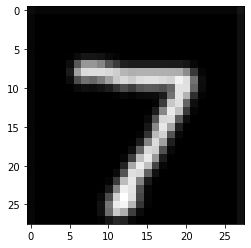

In [116]:

# import all required lib
import matplotlib.pyplot as plt
from IPython import get_ipython
#=============================================================================================
import cv2
#=============================================================================================

# get_ipython().run_line_magic('matplotlib', 'inline')

%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# Load a color image in grayscale
image = cv2.imread('sample_digit.png', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('number.png', cv2.IMREAD_GRAYSCALE)

image = resize(image, (28, 28), mode='reflect')

print('This image is: ', type(image), 'with dimensions:', image.shape)
plt.imshow(image, cmap='gray')


thresh is:  0.38745098039215686


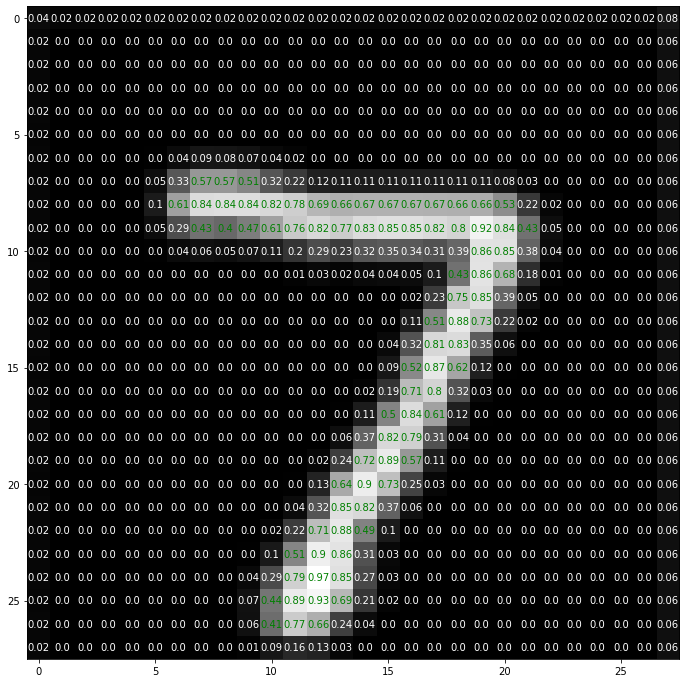

In [117]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape

    thresh = img.max() / 2.5
    print('thresh is: ', thresh)
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[ x ][ y ], 2)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[ x ][ y ] < thresh else 'green')


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111) # (row, column, position)
visualize_input(image, ax)
            

# Convolutional layers in Keras

from keras.layers import Conv2D

# create a convolutional layer
Conv2D(filters, kernel_size, strides, padding, activation = 'relu', input_shape)

- filters : The number of filters.
    
- kernel_size : A number specifying both the height and width of the (square)
convolution window. There are also some additional optional arguments that
you might like to tune.
            
- strides : The stride of the convolution. If you don't specify anything, this is set
to one.
            
- padding : This is either Valid or Same . If you don't specify anything, the padding
is set to Valid .
 'Same' is used to make the output size is the same as the input size
            
- activation : This is typically SFMV . If you don't specify anything, no activation
is applied. You are strongly encouraged to add a ReLU activation function to
every convolutional layer in your networks.

In [2]:
from keras.layers import Conv2D

Conv2D(filters = 16, kernel_size = 2, strides = 2, activation = 'relu', input_shape = (200, 200, 1))

In [4]:
Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')

In [3]:
Conv2D(64, (2, 2), activation = 'relu')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_______________________

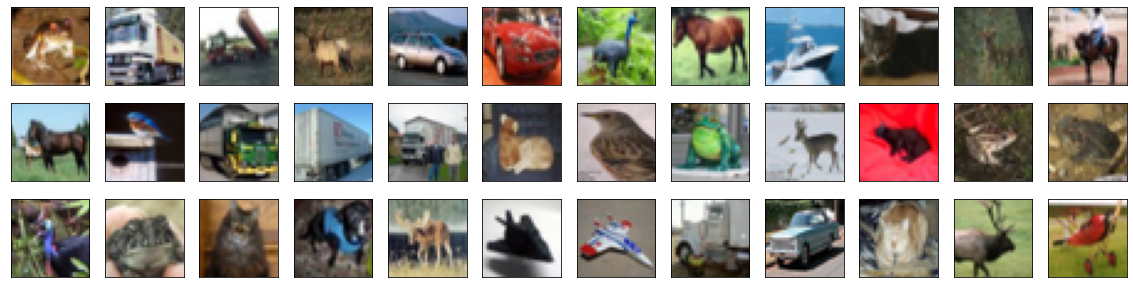

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.utils import np_utils



# Retrieving the training and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

fig = plt.figure(figsize=(20,5))

for i in range(36):
   ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
   ax.imshow(np.squeeze(x_train[i]))  # function is used when we want to remove single-dimensional entries from the shape of an array.


# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32') / 255


# one-hot encode the labels
'''List all value from 0 to 9'''
num_classes = len(np.unique(y_train)) # Find the unique elements of an array.


# to_categorical is Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, num_classes)   
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# printing number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_test = x_test.astype('float32')/255


# Create a model===========================================================================
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

#=========================================================================================

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
 metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)


hist = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, callbacks=[checkpointer],
                 validation_data=(x_valid, y_valid), shuffle=True)

In [39]:
# from keras.datasets import mnist
# import matplotlib.pyplot as plt

# # Loading data 
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Creating a grid of 3x3 images
# for i in range(9):
#     plt.subplot(330 + 1 + i) # Row x column x index
#     plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# # Display the plot
# plt.show()

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# Creating and configuring augumented image generator

# width_shift_range is shifting randomly images horizontally (10% of total width)
# height_shift_range is shifting randomly images vertically (10% of total height)
# horizontal_flip is flipping randomly images horizontally

datagen_train = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen_valid = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

datagen_train.fit(x_train)
datagen_valid.fit(x_valid)

# CNN architectures and drawbacks of DNNs

# 1: Applying pooling operations in TensorFlow

In [48]:
import tensorflow as tf
    
x = tf.constant([[2., 4., 6., 8.], [10., 12., 14., 16.]])

# Now let's give it a shape accepted by tf.nn.max_pool:
x = tf.reshape(x, [1, 2, 4, 1])

# If we want to apply the VALID padding with the max pool with a 2 x 2 kernel, stride 2:
VALID = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')

# Using the max pool with a 2 x 2 kernel, stride 2 and SAME padding:
SAME = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
print(x, '\n')
print(VALID, '\n')
print(SAME)

tf.Tensor(
[[[[ 2.]
   [ 4.]
   [ 6.]
   [ 8.]]

  [[10.]
   [12.]
   [14.]
   [16.]]]], shape=(1, 2, 4, 1), dtype=float32) 

tf.Tensor(
[[[[12.]
   [16.]]]], shape=(1, 1, 2, 1), dtype=float32) 

tf.Tensor(
[[[[12.]
   [16.]]]], shape=(1, 1, 2, 1), dtype=float32)


# Convolution operations in TensorFlow

In [59]:
def conv_layer(data, weights, bias, strides=1):
    x = tf.nn.conv2D(x,
                     weights,
                     strides=[1, strides, strides, 1],
                     padding='SAME',
                    )
    x = tf.nn.bias_add(x, bias)
    return tf.nn.relu(x)



In [2]:
import import_ipynb
import time
import math
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import Preprocessor
import cv2
import LayersConstructor


from sklearn.metrics import confusion_matrix
import datetime
from datetime import timedelta
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

Instructions for updating:
non-resource variables are not supported in the long term
importing Jupyter notebook from Preprocessor.ipynb
importing Jupyter notebook from LayersConstructor.ipynb


/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
# Convolutional Layer 1.
filter_size1 = 3 
num_filters1 = 32

# Convolutional Layer 2.
filter_size2 = 3
num_filters2 = 32

# Convolutional Layer 3.
filter_size3 = 3
num_filters3 = 64

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Learning rate. Let's make the training slower for more intensive training 
learning_rate=1e-4 

# the number of color channels as 3 for the images
num_channels = 3

# the image dimensions should be squares
img_size = 128

# the size of the image when flattened to a single dimension would be the multiplication of the image dimension and the number of channels
img_size_flat = img_size * img_size * num_channels

# reshape the image for the max pooling and convolutional layers
# it would be the tuple with height and width of images used to reshape arrays:
img_shape =  (img_size, img_size)

# Let's explicitly define the class info as follows:
classes = ['dogs1', 'cats1']

num_classes = len(classes)

batch_size = 14

# portion of the training set will be used as the validation split
# Let's assume that 16% will be used, for simplicity:
validation_size = 0.16

# how long to wait after the validation loss stops improving
# before terminating the training. We should use none if we do not want to implement early
# stopping:
early_stoping = None

'''path of download'''
train_path = 'cats_and_dogs/training/'
test_path = 'cats_and_dogs/testing/'
checkpoint_dir = 'models/'

data = Preprocessor.read_train_sets(train_path, img_size, classes, validation_size=validation_size)
test_images, test_ids = Preprocessor.read_test_set(test_path, img_size)

def plot_images(images, cls_true, cls_pred = None):
    random_indices = []
    
    if len(images) == 0:
        print('no images to show')
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9)) 
        print(random_indices, '====================================================')
    
    print(zip(*[(images[i], cls_true[i]) for i in random_indices]))
    images, cls_true, = [zip(images[i], cls_true[i]) for i in random_indices]
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_size, img_size, num_channels))
            
        if cls_pred is None:
            xlabel = 'True: {}'.format(cls_true[i])
        else:
            xlabel = 'True: {}, pred: {}'.format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()
    
# Get some random images and their labels from the train set.
images, cls_true  = data.train.images, data.train.cls

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)


# ============================================================================================
print('Size of: \n')
print('  - Train set: ', len(data.train.images))
print('  - Test set: ', len(test_images))
print('  - Validation set: ', len(data.valid.labels))
# =============================================================================================

# Get some random images and their labels from the train set.
images, cls_true  = data.train.images, data.train.cls

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

layer_conv1, weights_conv1 = \
    LayersConstructor.new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

layer_conv2, weights_conv2 = \
    LayersConstructor.new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

layer_conv3, weights_conv3 = \
    LayersConstructor.new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)

layer_flat, num_features = LayersConstructor.flatten_layer(layer_conv3)
layer_fc1 = LayersConstructor.new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)
layer_fc2 = LayersConstructor.new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)


#===============================-----------------------------------------------------------------
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_fc2,
                                                        labels=y_true)

cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()
session = tf.Session()
session.run(init_op)
train_batch_size = batch_size

acc_list = []
val_acc_list = []

early_stopping = None
#=================================------------------------------------------------------------------


def print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss):
    # Calculate the accuracy on the training-set.
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
    return acc, val_acc
  
# Counter for total number of iterations performed so far.
total_iterations = 0
iter_list = []

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    best_val_loss = float("inf")
    patience = 0

    for i in range(total_iterations, total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        #------------------------------------------------------------------------------------------------------
        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(train_batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(train_batch_size)

        # Convert shape from [num examples, rows, columns, depth]
        # to [num examples, flattened image shape]

        x_batch = x_batch.reshape(train_batch_size, img_size_flat)
        x_valid_batch = x_valid_batch.reshape(train_batch_size, img_size_flat)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch, y_true: y_true_batch}        
        feed_dict_validate = {x: x_valid_batch, y_true: y_valid_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)        

        # Print status at end of each epoch (defined as full pass through training Preprocessor).
        if i % int(data.train.num_examples/batch_size) == 0: 
            
            val_loss = session.run(cost, feed_dict=feed_dict_validate)
            epoch = int(i / int(data.train.num_examples/batch_size))
            
            acc, val_acc = print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss)
            msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Validation Loss: {3:.3f}"
            print(msg.format(epoch + 1, acc, val_acc, val_loss))
            print(acc)
            acc_list.append(acc)
            val_acc_list.append(val_acc)
            iter_list.append(epoch+1)
            
            if early_stopping:    
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience = 0
                else:
                    patience += 1
                if patience == early_stopping:
                    break

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

def plot_example_errors(cls_pred, correct):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.valid.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.valid.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])

def plot_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.valid.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    # Compute the precision, recall and f1 score of the classification
    p, r, f, s = precision_recall_fscore_support(cls_true, cls_pred, average='weighted')
    print('Precision:', p)
    print('Recall:', r)
    print('F1-score:', f)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def print_validation_accuracy(show_example_errors=False, show_confusion_matrix=False):
    # Number of images in the test-set.
    num_test = len(data.valid.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_test)
        print(data.valid.images[i:j, :].shape, img_size_flat)
        # Get the images from the test-set between index i and j.
        images = data.valid.images[i:j, :].reshape(len(data.valid.images[i:j, :]), img_size_flat)#------------------------
        

        # Get the associated labels.
        labels = data.valid.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images, y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    cls_true = np.array(data.valid.cls)
    cls_pred = np.array([classes[x] for x in cls_pred]) 

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)       
       
#Evaluation and optimization 
optimize(num_iterations=10)
print(acc_list)

# Plot loss over time
plt.plot(iter_list, acc_list, 'r--', label='CNN training accuracy per iteration', linewidth=4)
plt.title('CNN training accuracy per iteration')
plt.xlabel('Iteration')
plt.ylabel('CNN training accuracy')
plt.legend(loc='upper right')
plt.show()

# Plot loss over time
plt.plot(iter_list, val_acc_list, 'r--', label='CNN validation accuracy per iteration', linewidth=4)
plt.title('CNN validation accuracy per iteration')
plt.xlabel('Iteration')
plt.ylabel('CNN validation accuracy')
plt.legend(loc='upper right')
plt.show()  

print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)
plt.axis('off')
test_cat = cv2.imread('models/7.jpg')
test_cat = cv2.resize(test_cat, (img_size, img_size), cv2.INTER_LINEAR) / 255
preview_cat = plt.imshow(test_cat.reshape(img_size, img_size, num_channels))

test_dog = cv2.imread('models/3.jpg')
test_dog = cv2.resize(test_dog, (img_size, img_size), cv2.INTER_LINEAR) / 255
preview_dog = plt.imshow(test_dog.reshape(img_size, img_size, num_channels))

def sample_prediction(test_im):    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[1, 0]])
    }
    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_cat: {}".format(sample_prediction(test_cat)))
print("Predicted class for test_dog: {}".format(sample_prediction(test_dog)))

session.close()

Reading training images
Loading dogs1 files (Index: 0)
Loading cats1 files (Index: 1)
Reading training images
Loading dogs1 files (Index: 0)
Loading cats1 files (Index: 1)
[14, 103, 98, 49, 26, 2, 94, 88, 18] ====================================================


ValueError: too many values to unpack (expected 2)